# Análise exploratória.

Tópicos que vão orientar esta etapa:
* Palvras associadas a sentimentos positivos.
* Palvras associadas a sentimentos negativos.
* Palvras associadas a sentimentos neutros.
* Quais produtos estão associados a sentimentos positivos e negativos.
* Proporção dos sentimentos.
* Distribuição das palavras.
* Palavras mais comuns.
* Palavras únicas.
* Distribuição de texto.

In [90]:
#manipulacao
import pandas as pd
from collections import Counter
import numpy as np
from PIL import Image

#graficos
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


## Informação do conjunto de dados.

In [91]:
df_tweets = pd.read_csv(r'C:\Users\abraz\OneDrive\Área de Trabalho\projetos\analise_sentimento_tt\dados\tweets_tratados.csv')
df_tweets.head()

,texto_final,sentimento
0,gente amo perfumes egeo boticário,1
1,carai botica 214 boticário amo dark mint puta ...,1
2,comprar boticário tia perigo sai parcelando pe...,0
3,boticário eslu caruaru,0
4,uso natura boticário feliz vida kkk,1


In [92]:
df_tweets.shape

(4825, 2)

In [93]:
df_tweets.describe()

,sentimento
count,4825.000000
mean,0.117513
std,0.763270
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Verficando dados duplicados.

Existe algumas duplicatas no conjunto de dados, elas serão removidas.

In [94]:
df_tweets.duplicated().sum()

57

In [95]:
duplicatas = df_tweets.duplicated()
dataframe_duplicado = df_tweets[duplicatas]

dataframe_duplicado.head()

,texto_final,sentimento
245,boticário,0
387,boticário,0
566,campanha joão boticário reúne tradição novo,0
587,tecnologia precisa andar junto operação negóci...,0
591,não compro de magalu ambev boticário itau glob...,0


In [96]:
df_tweets = df_tweets.drop_duplicates()
df_tweets = df_tweets.reset_index(drop=True)
df_tweets

,texto_final,sentimento
0,gente amo perfumes egeo boticário,1
1,carai botica 214 boticário amo dark mint puta ...,1
2,comprar boticário tia perigo sai parcelando pe...,0
3,boticário eslu caruaru,0
4,uso natura boticário feliz vida kkk,1
...,...,...
4763,accordes oboticário,0
4764,fracasso,0
4765,desculpa diz realengo não sabe onde ficam port...,0
4766,studiar diventar uomini volar empoli per il co...,0


### Verificando valores nulos.

In [97]:
df_tweets.isnull().sum()

texto_final    0
sentimento     0
dtype: int64

## Proporção dos sentimentos.

Como está a proporção dos sentimentos no conjunto de dados?

In [98]:
temp = df_tweets.groupby('sentimento').agg(soma = ('sentimento','count')).sort_values(by='soma')
temp.style.background_gradient(cmap='Purples')

#temp

,soma
sentimento,
-1,1149
1,1720
0,1899


[]

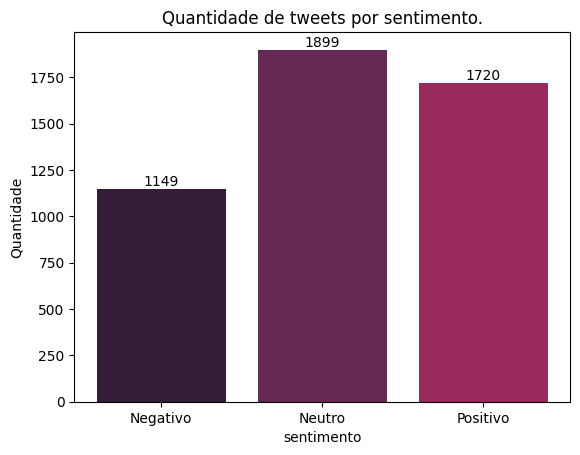

In [99]:
sentimento = ['Negativo', 'Neutro', 'Positivo']
# Definir a paleta de cores

sns.set_palette("rocket")

ax = sns.countplot(x='sentimento',data=df_tweets)

plt.ylabel('Quantidade')
plt.xticks(range(len(sentimento)), sentimento)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.title('Quantidade de tweets por sentimento.')
plt.plot()

Observa-se que os tweets neutros são mais frequentes, seguidos pelos positivos e negativos.

## Palavras mais comuns.

In [100]:
df_tweets['temp_list'] = df_tweets['texto_final'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_tweets['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Palavras','Quantidade']
temp.style.background_gradient(cmap='Purples')

,Palavras,Quantidade
0,boticário,1841
1,malbec,1523
2,não,882
3,perfume,879
4,egeo,709
5,cheiro,446
6,rosto_sorridente_com_3_corações,381
7,kkk,365
8,floratta,334
9,comprei,264


Percebe-se que das palavras mais frequentes no dataset 5 delas são produtos do Boticário.

In [101]:
positivo = df_tweets[df_tweets.sentimento == 1]
negativo = df_tweets[df_tweets.sentimento == -1]
neutro = df_tweets[df_tweets.sentimento == 0]

### Palavras mais comuns: Sentimentos positivos.

In [102]:
top = Counter([item for sublist in positivo['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Palavras_comuns_positivo','Quantidade']
temp_positive.style.background_gradient(cmap='Greens')

,Palavras_comuns_positivo,Quantidade
0,boticário,637
1,malbec,474
2,perfume,367
3,rosto_sorridente_com_3_corações,342
4,egeo,335
5,não,197
6,rosto_sorridente_com_olhos_de_coração,181
7,kkk,176
8,amo,158
9,cheiro,155


### Palavras mais comuns: Sentimentos negativos.

In [103]:
top = Counter([item for sublist in negativo['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Palavras_comuns_negativo','Quantidade']
temp_positive.style.background_gradient(cmap='Reds')

,Palavras_comuns_negativo,Quantidade
0,boticário,475
1,malbec,405
2,não,367
3,perfume,231
4,cheiro,168
5,egeo,164
6,rosto_chorando_aos_berros,137
7,usa,76
8,comprar,74
9,kkk,66


### Palavras mais comuns: Sentimentos neutros.

In [104]:
top = Counter([item for sublist in neutro['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Palavras_comuns_neutro','Quantidade']
temp_positive.style.background_gradient(cmap='Greys')

,Palavras_comuns_neutro,Quantidade
0,boticário,729
1,malbec,644
2,não,318
3,perfume,281
4,egeo,210
5,floratta,134
6,kkk,123
7,cheiro,123
8,dia,103
9,comprar,98


Nota-se que as palavras boticario, malbec e nao são as mais frequentes nas três categorias de sentimentos. A palavra boticario era esperada, mas a palavra malbec surpreende por estar em segundo lugar em todas as categorias, o que indica que a linha Malbec tem uma boa presença no Twitter nesse período e talvez necessite de uma estratégia mais eficaz para converter os usuários com tweets neutros e negativos em positivos.

## Nuvem de palavras.

### Nuvem positiva.

(-0.5, 1599.5, 799.5, -0.5)

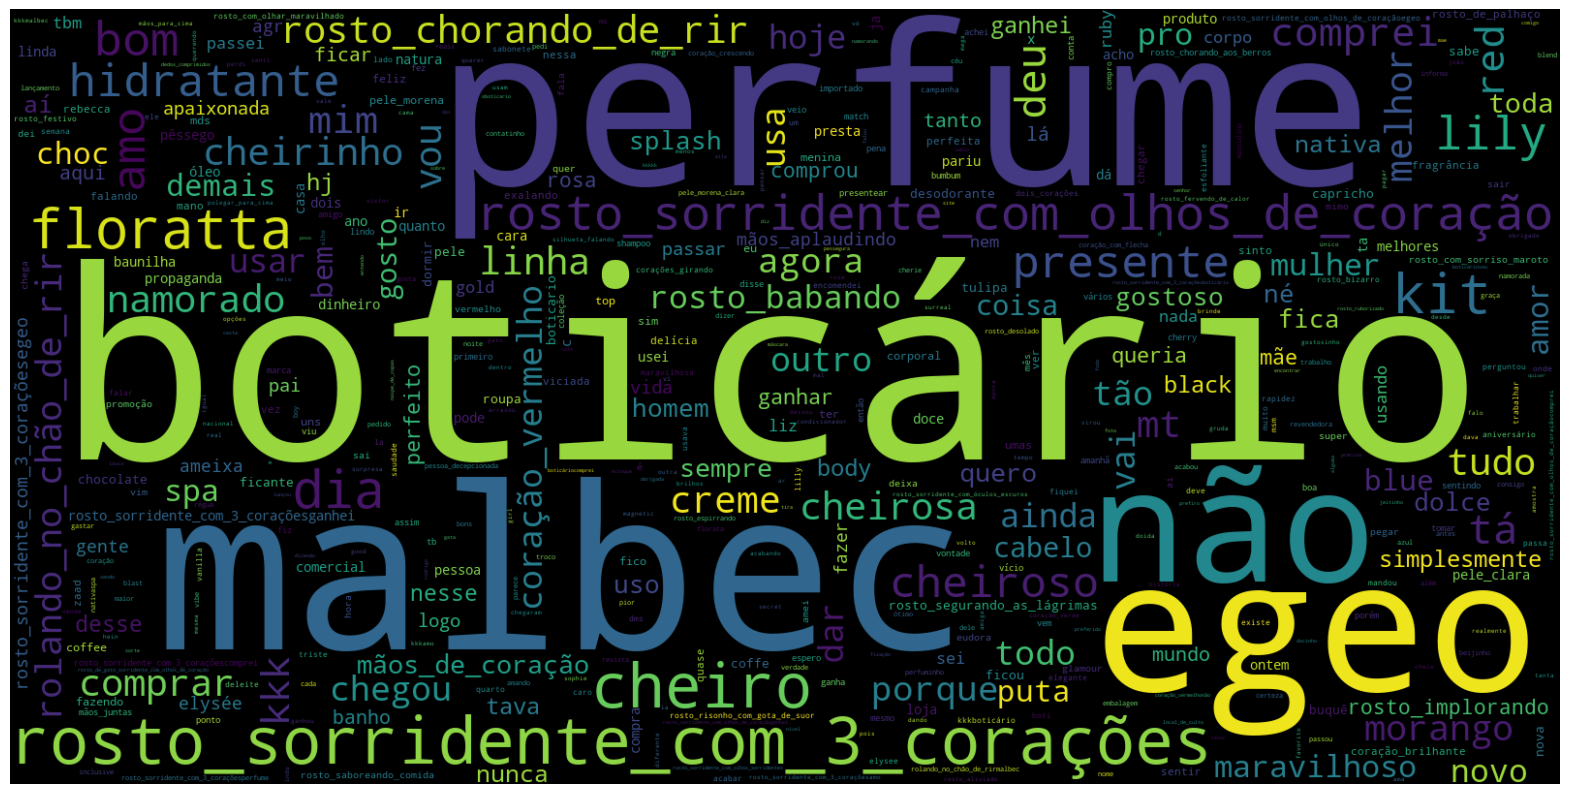

In [105]:
positivo_agrupado = positivo.texto_final.str.cat()

#Gerando nuvem
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               collocations=False).generate(positivo_agrupado)

#plotando
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

### Nuvem negativa.

(-0.5, 1599.5, 799.5, -0.5)

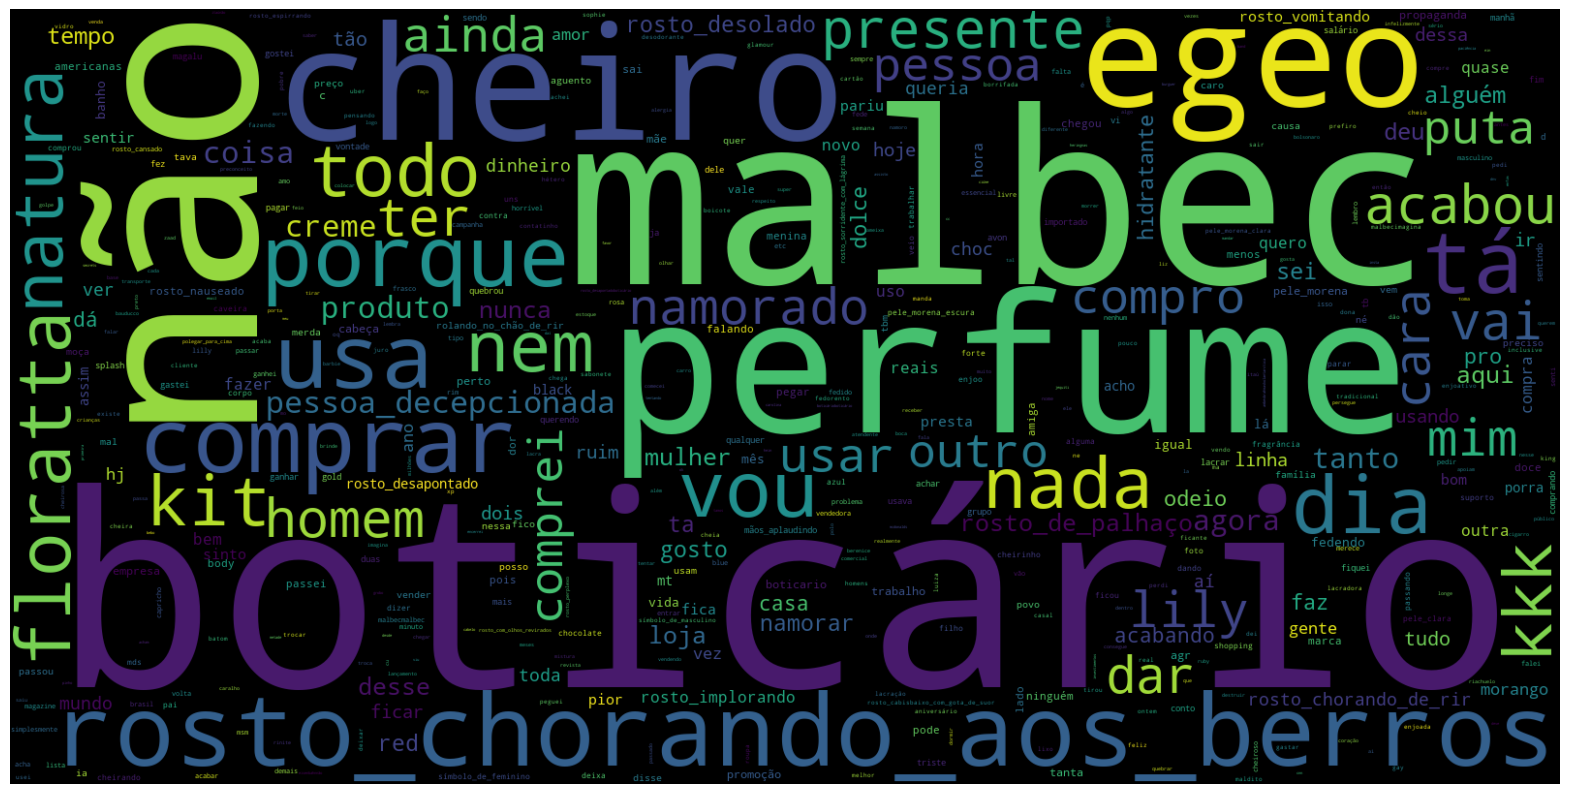

In [106]:
negativo_agrupado = negativo.texto_final.str.cat()

#Gerando nuvem
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               collocations=False).generate(negativo_agrupado)

#plotando
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

### Nuvem neutra

(-0.5, 1599.5, 799.5, -0.5)

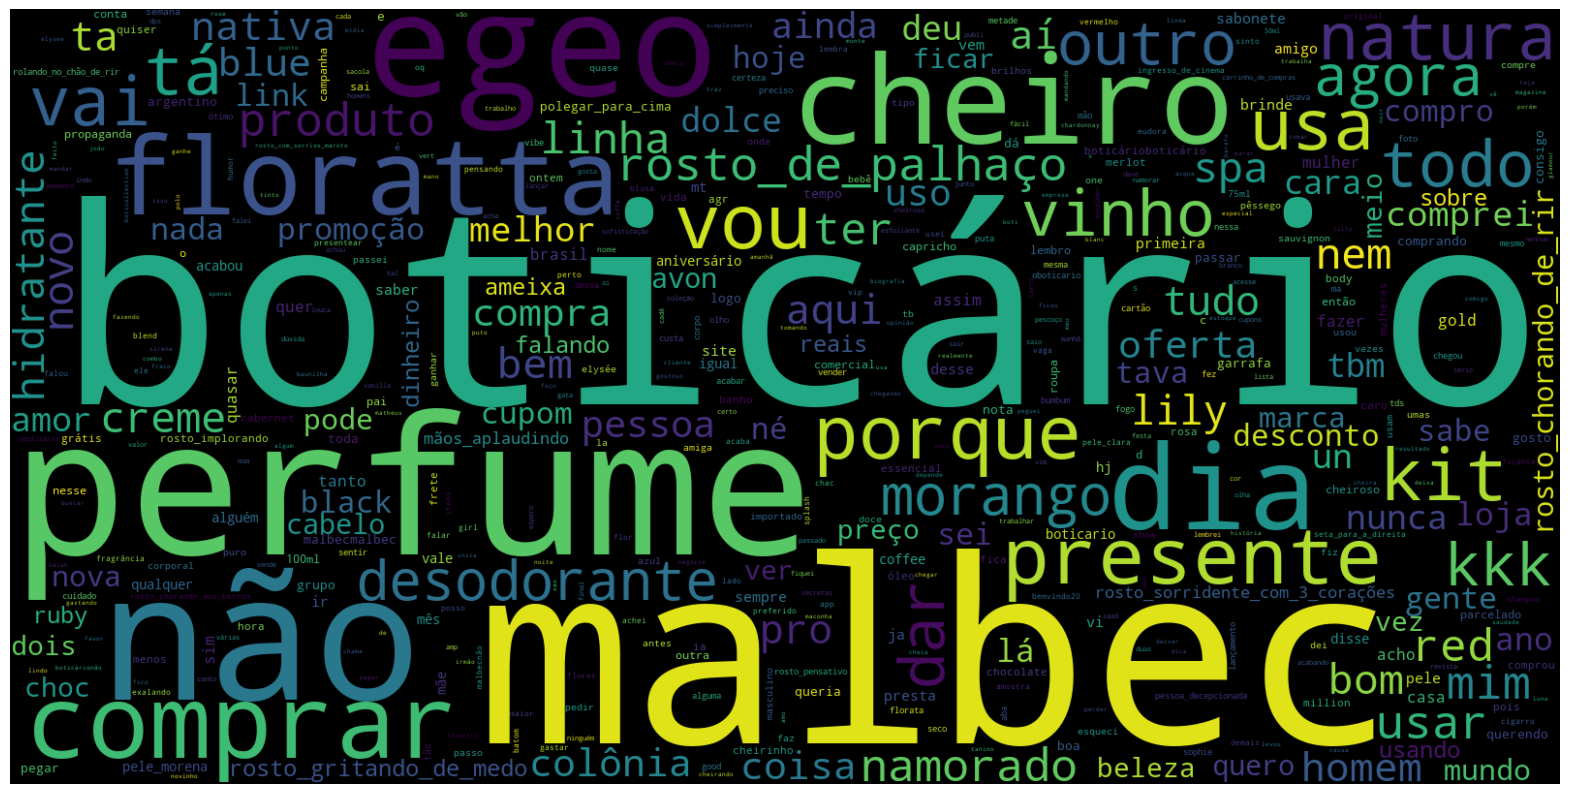

In [107]:
neutro_agrupado = neutro.texto_final.str.cat()

#Gerando nuvem
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               collocations=False).generate(neutro_agrupado)

#plotando
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

<Figure size 640x480 with 0 Axes>

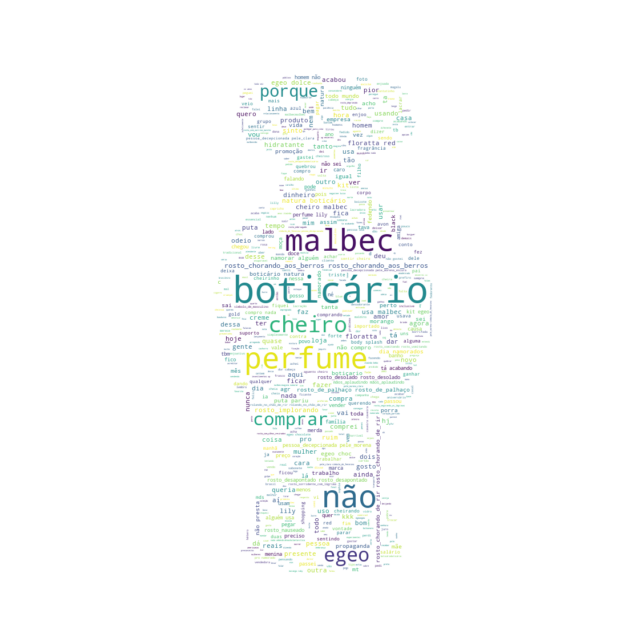

<Figure size 640x480 with 0 Axes>

In [108]:
text = negativo_agrupado
perfum_mask = np.array(Image.open(r'C:\Users\abraz\OneDrive\Área de Trabalho\projetos\analise_sentimento_tt\imagens\img_perfume_projeto_tweets.png'))
wc = WordCloud(background_color="white", max_words=2000, mask=perfum_mask)


wc.generate(text)


plt.figure(figsize = (12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()

## Distribuição texto

In [109]:
#def hist_tweets()
df_tweets['num_palavras'] = df_tweets.temp_list.apply(lambda x: len(x))
df_tweets.head()

,texto_final,sentimento,temp_list,num_palavras
0,gente amo perfumes egeo boticário,1,"[gente, amo, perfumes, egeo, boticário]",5
1,carai botica 214 boticário amo dark mint puta ...,1,"[carai, botica, 214, boticário, amo, dark, min...",12
2,comprar boticário tia perigo sai parcelando pe...,0,"[comprar, boticário, tia, perigo, sai, parcela...",9
3,boticário eslu caruaru,0,"[boticário, eslu, caruaru]",3
4,uso natura boticário feliz vida kkk,1,"[uso, natura, boticário, feliz, vida, kkk]",6


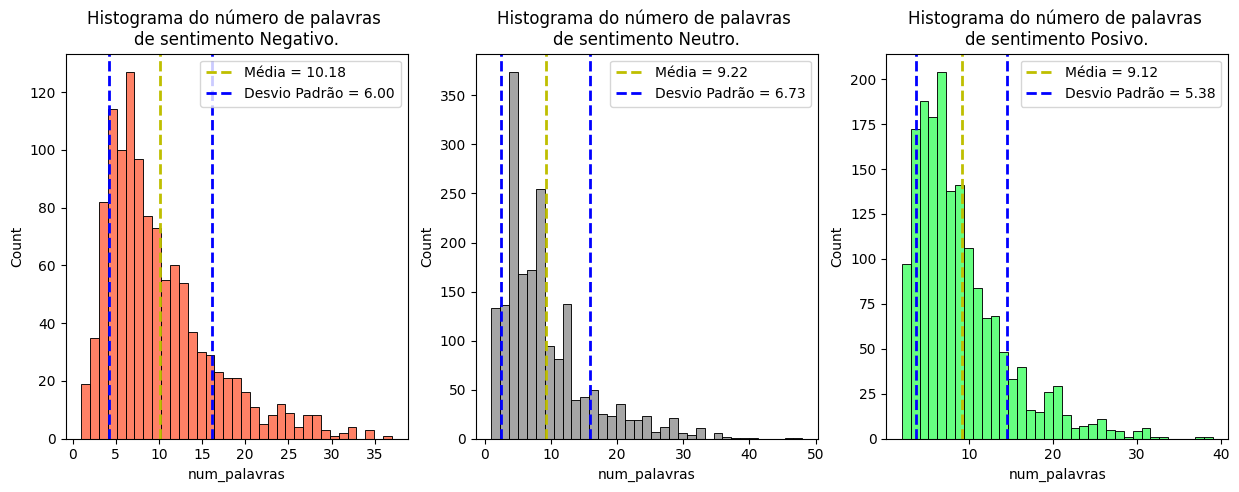

In [110]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

cores_personalizadas = ["#FF5733", "#888888", "#33FF57"]
sentimento = ['Negativo', 'Neutro', 'Posivo']

for i in range(-1,2):
    #indice
    idx = i + 1
    #acessa df sentimento
    teste = df_tweets[df_tweets.sentimento==i] 
    #histograma
    sns.histplot(data=teste, x='num_palavras', ax=axs[idx], bins=35, color=cores_personalizadas[idx])
    #titulo
    axs[idx].set_title(f'Histograma do número de palavras \nde sentimento {sentimento[idx]}.')

    media = np.mean(teste.num_palavras)
    desvio_padrao = np.std(teste.num_palavras)

    # Adicionar uma linha vertical para mostrar a média
    axs[idx].axvline(media, color='y', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')

    # Adicionar uma segunda linha vertical para mostrar o desvio padrão
    axs[idx].axvline(media + desvio_padrao, color='b', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {desvio_padrao:.2f}')
    axs[idx].axvline(media - desvio_padrao, color='b', linestyle='dashed', linewidth=2)

    axs[idx].legend()
    

O número de palavras usadas para expressar o sentimento nos tweets não varia muito, sendo em média nove palavras significativas por tweet. Relembrando que, essas palavras foram obtidas após o pré-processamento que removeu as stop words dos dados

## Palavras únicas.

In [111]:
raw_text = [word for word_list in df_tweets['temp_list'] for word in word_list]

In [112]:
def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in df_tweets[df_tweets.sentimento != sentiment]['temp_list']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in df_tweets[df_tweets.sentimento == sentiment]['temp_list']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['Palavra','Quantidade'])
    
    return Unique_words

In [113]:
Unique_Positive= words_unique(1, 20, raw_text)
print("Top 20 palavras unicas do tweets de sentimento positivo:")
Unique_Positive.style.background_gradient(cmap='Greens')

Top 20 palavras unicas do tweets de sentimento positivo:


,Palavra,Quantidade
0,rosto_saboreando_comida,16
1,corações_girando,9
2,coração_com_flecha,9
3,cheirosinha,7
4,céu,6
5,surpresa,6
6,victor,6
7,coroa,6
8,dava,5
9,arrasou,5


In [114]:
Unique_Positive= words_unique(-1, 20, raw_text)
print("Top 20 palavras unicas do tweets de sentimento negativos:")
Unique_Positive.style.background_gradient(cmap='Reds')

Top 20 palavras unicas do tweets de sentimento negativos:


,Palavra,Quantidade
0,rosto_vomitando,22
1,fedido,9
2,pavor,9
3,lacrar,8
4,rosto_cabisbaixo_com_gota_de_suor,7
5,raiva,7
6,fede,6
7,dedo_do_meio,6
8,credo,6
9,fedorento,6


In [115]:
Unique_Positive= words_unique(0, 20, raw_text)
print("Top 20 palavras unicas do tweets de sentimento neutros:")
Unique_Positive.style.background_gradient(cmap='Greys')

Top 20 palavras unicas do tweets de sentimento neutros:


,Palavra,Quantidade
0,oferta,29
1,link,25
2,beleza,17
3,argentino,16
4,75ml,14
5,saude,12
6,cabernet,12
7,parcelado,11
8,sirene,10
9,one,10


Embora as palavras únicas não revelem muito sobre o conjunto de dados, elas indicam com bastante clareza se um sentimento é negativo, positivo ou neutro.

## Produtos relacionados a sentimentos

In [116]:
def retira_perfume(linha):
    produto =['malbec','alchemist','the blend','zaad','quasar','egeo','botica','sophie',
           'capricho','nativa spa','floratta','glamour','lily','boticollection','elysée','celebre',
           'liz','connexion','coffee','linda','men','accordes','arbo','portinari','styletto','uomini',
           'insensatez','dream','botica 214','boti',' make']

    lista = linha.split()
    perfume = []
    for i in lista:
        if i in produto:
            perfume.append(i)
    if len(perfume) == 0:
        return ['vazio']
    else:
        unico = np.array(perfume)
        perfume = list(np.unique(unico))
        return perfume

In [125]:
df_tweets['perfume'] = df_tweets.texto_final.apply(retira_perfume)
df_tweets.head()

,texto_final,sentimento,temp_list,num_palavras,perfume
0,gente amo perfumes egeo boticário,1,"[gente, amo, perfumes, egeo, boticário]",5,[egeo]
1,carai botica 214 boticário amo dark mint puta ...,1,"[carai, botica, 214, boticário, amo, dark, min...",12,[botica]
2,comprar boticário tia perigo sai parcelando pe...,0,"[comprar, boticário, tia, perigo, sai, parcela...",9,[vazio]
3,boticário eslu caruaru,0,"[boticário, eslu, caruaru]",3,[vazio]
4,uso natura boticário feliz vida kkk,1,"[uso, natura, boticário, feliz, vida, kkk]",6,[vazio]


In [126]:
dummies = pd.get_dummies(df_tweets['perfume'].explode(), dtype=int)
dummies = dummies.groupby(level=0).sum()
df_tweets = pd.concat([df_tweets, dummies], axis=1)
df_tweets.head()

,texto_final,sentimento,temp_list,num_palavras,perfume,accordes,arbo,boti,botica,boticollection,...,liz,malbec,men,portinari,quasar,sophie,styletto,uomini,vazio,zaad
0,gente amo perfumes egeo boticário,1,"[gente, amo, perfumes, egeo, boticário]",5,[egeo],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,carai botica 214 boticário amo dark mint puta ...,1,"[carai, botica, 214, boticário, amo, dark, min...",12,[botica],0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,comprar boticário tia perigo sai parcelando pe...,0,"[comprar, boticário, tia, perigo, sai, parcela...",9,[vazio],0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,boticário eslu caruaru,0,"[boticário, eslu, caruaru]",3,[vazio],0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,uso natura boticário feliz vida kkk,1,"[uso, natura, boticário, feliz, vida, kkk]",6,[vazio],0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [127]:
df_tweets.columns

Index(['texto_final', 'sentimento', 'temp_list', 'num_palavras', 'perfume',
       'accordes', 'arbo', 'boti', 'botica', 'boticollection', 'capricho',
       'celebre', 'coffee', 'connexion', 'dream', 'egeo', 'elysée', 'floratta',
       'glamour', 'insensatez', 'lily', 'linda', 'liz', 'malbec', 'men',
       'portinari', 'quasar', 'sophie', 'styletto', 'uomini', 'vazio', 'zaad'],
      dtype='object')

In [ ]:
perfumes = ['accordes', 'arbo', 'boticollection', 'capricho', 'connexion', 'egeo',
       'elysée', 'floratta', 'insensatez', 'malbec', 'portinari', 'styletto',
       'uomini', 'vazio']

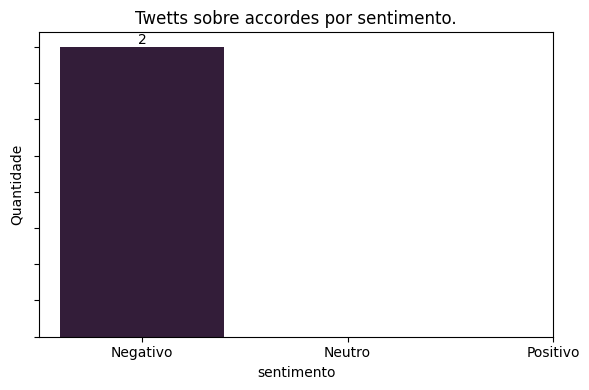

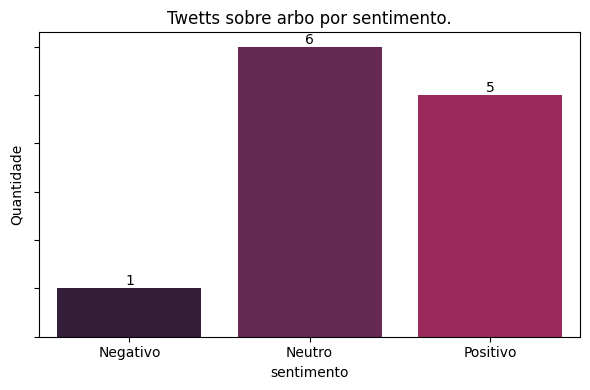

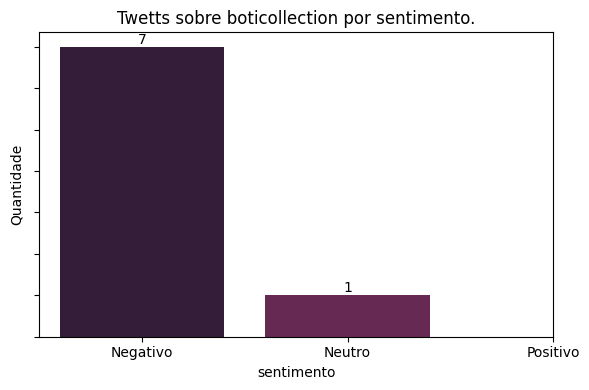

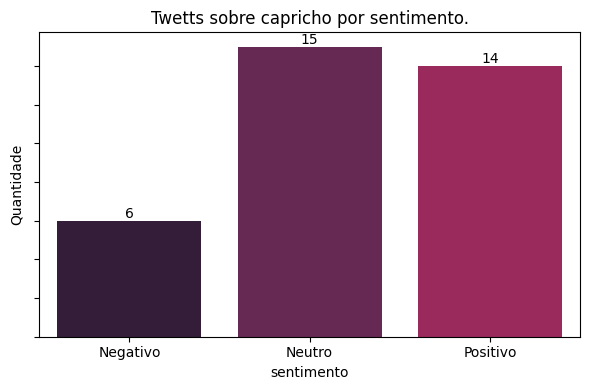

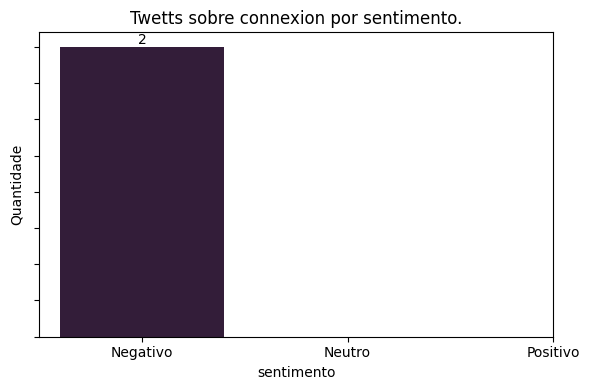

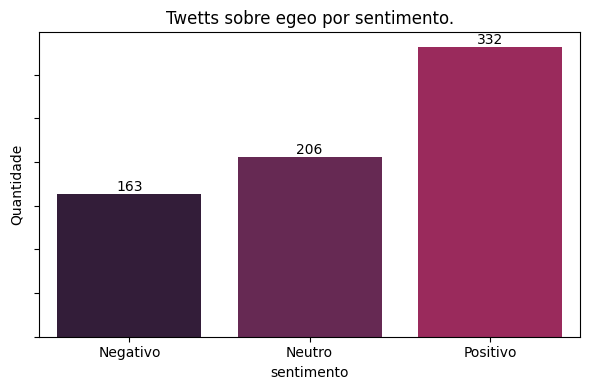

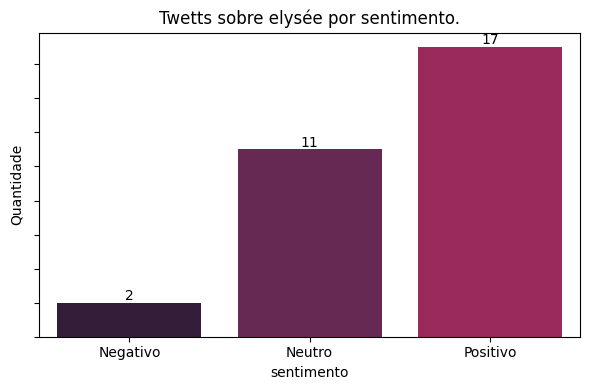

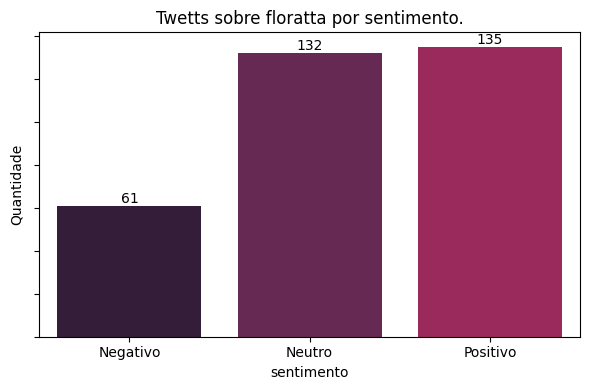

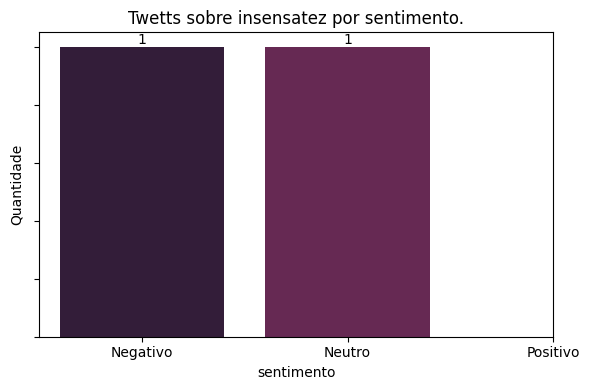

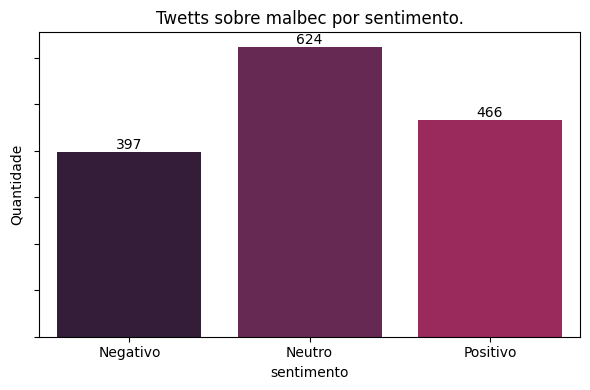

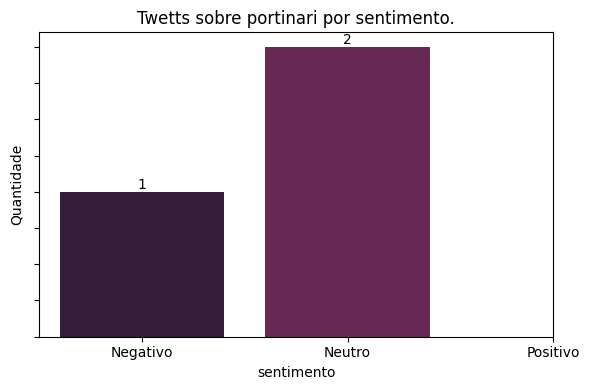

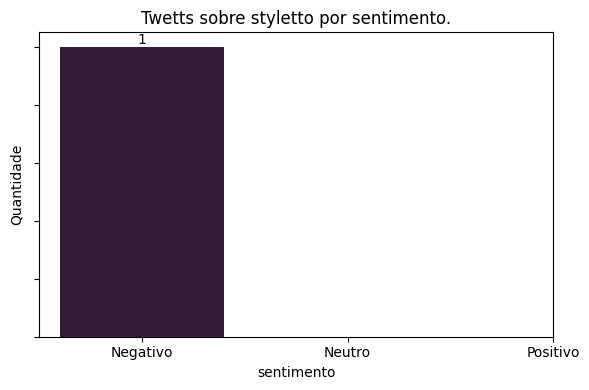

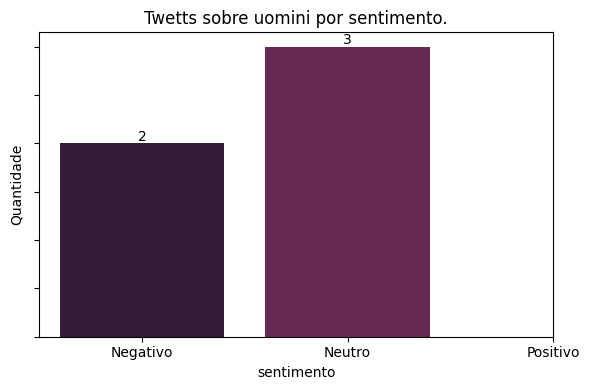

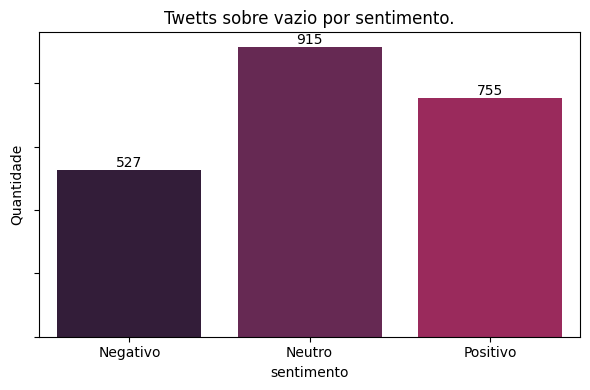

In [ ]:
sentimento = ['Negativo', 'Neutro', 'Positivo']
for idx in range(14):
    # Criar uma nova figura para cada gráfico
    plt.figure(figsize=(6, 4))
    # Define perfume
    perfume = df_tweets[df_tweets[perfumes[idx]] == 1]
   

    ax = sns.countplot(x='sentimento', data=perfume)  

    ax.set_ylabel('Quantidade') 
    ax.set_yticklabels('')  
    ax.set_xticks(range(len(sentimento)))  
    ax.set_xticklabels(sentimento)  

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.title(f'Twetts sobre {perfumes[idx]} por sentimento.')
    plt.tight_layout()

plt.show()  

In [ ]:
a = len(df_tweets[df_tweets.vazio == 1])
b = len(df_tweets)

print(f'Tweets sem citação de perfumes {a}, {((a)/b)*100}%')
print(f'Tweets com citação de perfumes {b-a}, {((b-a)/b)*100}%')

Tweets sem citação de perfumes 2197, 46.07802013422819%
Tweets com citação de perfumes 2571, 53.92197986577181%


De todas as palavras chave utilizadas para fazer a busca no Twitter, apenas 13 dos produtos foram citados, totalizando 2560 tweets. Os produtos mais citados foram Malbec, Egeo e Elysée 